# ME1 


## Exploratory Data Analysis

- See the examples of basic visualization and Pandas on Canvas. 

#### Write full names of your team members here.

- Mia Rodgers

- Alex Larsen


## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [4]:
import pandas as pd

# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [32]:
#display all data. You can uncomment the code in the next line

# display(data)

data.shape

(200, 4)

In [6]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')

## Part 1 Tasks

Solve each of the following problems. 
- Check the example Python codes for data visualization and pandas DataFrame examples: EX1_pandas.zip on Week1 Synopsis in Canvas.

### (1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value? 

In [7]:
print("Means:\n", data.mean(), "\n\n")
print("Medians:\n", data.median(),"\n\n")
print("Modes:\n", data.mode().iloc[0])


Means:
 TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64 


Medians:
 TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64 


Modes:
 TV           17.2
Radio         4.1
Newspaper     8.7
Sales         9.7
Name: 0, dtype: float64


### (2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### (3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b). 


No handles with labels found to put in legend.


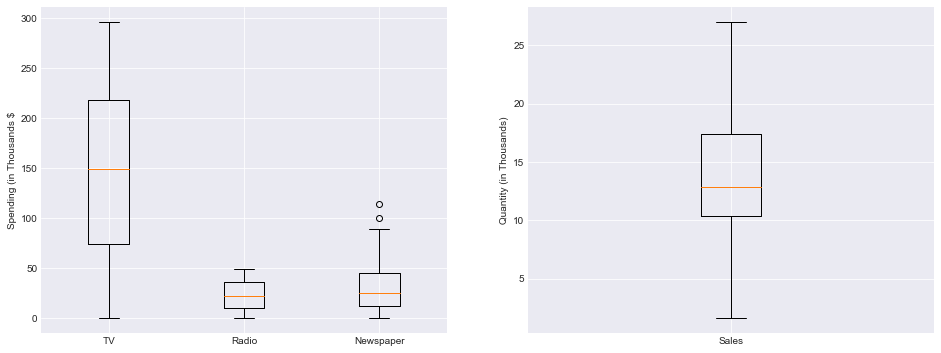

In [37]:
fig, ((a1, a2)) = plt.subplots(1, 2, figsize=[16, 6])
a1.boxplot([data[column] for column in data.columns[:3]],
            labels=[column for column in data.columns[:3]])
a1.set(ylabel='Spending (in Thousands $')
a2.boxplot(data.Sales, labels=['Sales'])
a2.set(ylabel='Quantity (in Thousands)')
plt.legend()
plt.show()

The boxplot visualizes the five-number summary (from part 2) for each of the fields with respect to each other and the daily sales quantites. 


### (4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)


No handles with labels found to put in legend.


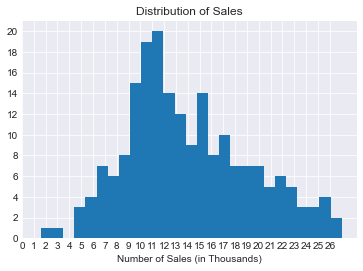

In [15]:
plt.hist(data.Sales, bins=27) 
plt.xticks([x for x in range(27)])
plt.yticks([2*x for x in range(11)])
plt.title('Distribution of Sales')
plt.xlabel('Number of Sales (in Thousands)')
plt.legend()
plt.show()

The distribution is unimodal


### (5) For Sales, visualize the trend of the data over time using a graph. 



No handles with labels found to put in legend.


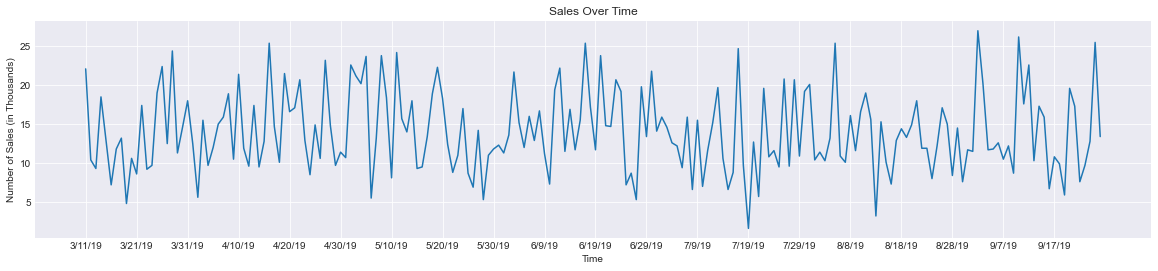

In [30]:
fig, ax = plt.subplots(figsize = (20, 4))
ax.plot(data.Sales)
ax.set(
    xticks=([x*10 for x in range(20)]),
    title=('Sales Over Time'), 
    xlabel=('Time'),
    ylabel=('Number of Sales (in Thousands)'))
ax.legend()
plt.show()

### (6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r. 


In [31]:
data.corr()['Sales']

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64


### (7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph. 

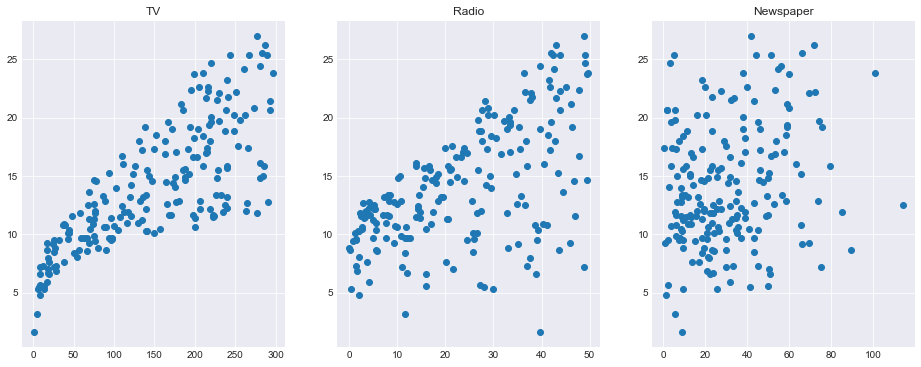

In [28]:
fig, ((a1, a2, a3)) = plt.subplots(1,3, figsize=[16, 6])
plots = [a1, a2, a3]
cols = ['TV','Radio','Newspaper']
for i in range(3):
    plots[i].scatter(data[cols[i]], data.Sales)
    plots[i].title.set_text(cols[i])

plt.show()

### (8) Discuss what the differences are between the three: (1) boxplot, (2) histogram, and (3) scatter plot with respect to your founding. 

- The boxplots display the descriptive statistics of the data and compare the spending for the different fields of the data.
- The histogram shows the distribution of the number of sales made across all of the days in the data set
- The scatter plots show the relationship between Sales and TV, Radio, and Newspaper spending

## Part 2
Write a summary of what you find from the data and submit the report to CAnvas. 

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html